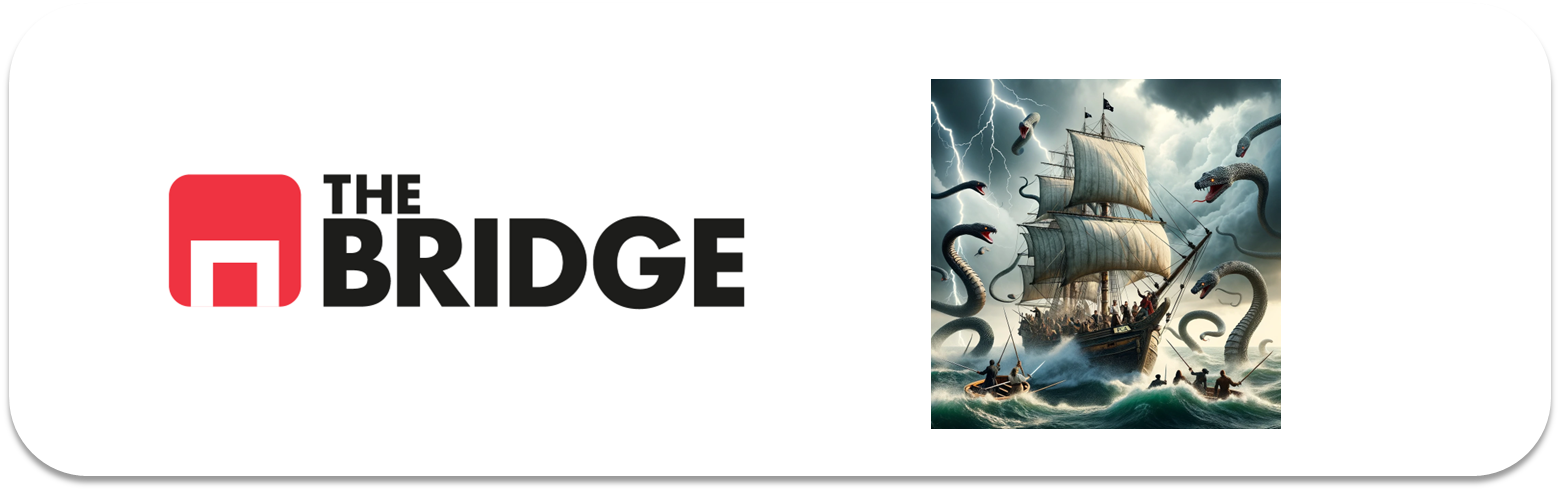

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif



### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [9]:
df = pd.read_csv('./data/credit_npo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [11]:
df.drop(columns=['MonthlyIncome', 'NumberOfDependents'], inplace = True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


<Axes: xlabel='SeriousDlqin2yrs', ylabel='percent'>

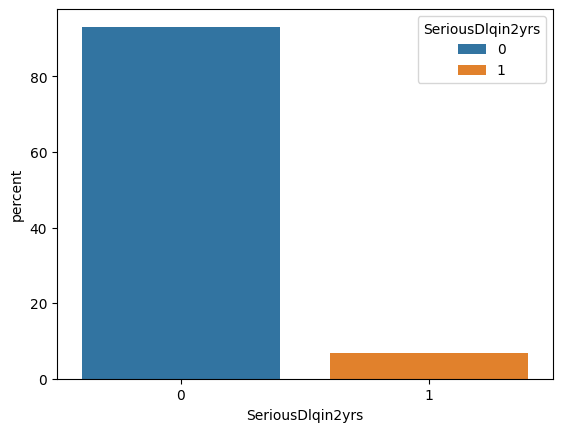

In [8]:
sns.countplot(x = 'SeriousDlqin2yrs', data = df, hue = 'SeriousDlqin2yrs', stat = 'percent')

In [13]:
from sklearn.model_selection import  train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['SeriousDlqin2yrs'], random_state=42)

In [16]:
features = train_set.columns.to_list()
features.remove('SeriousDlqin2yrs')
target = 'SeriousDlqin2yrs'

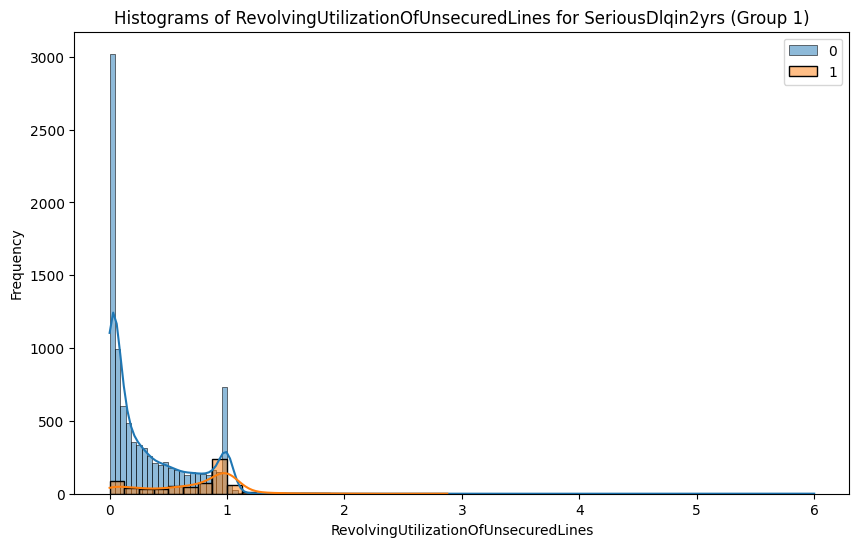

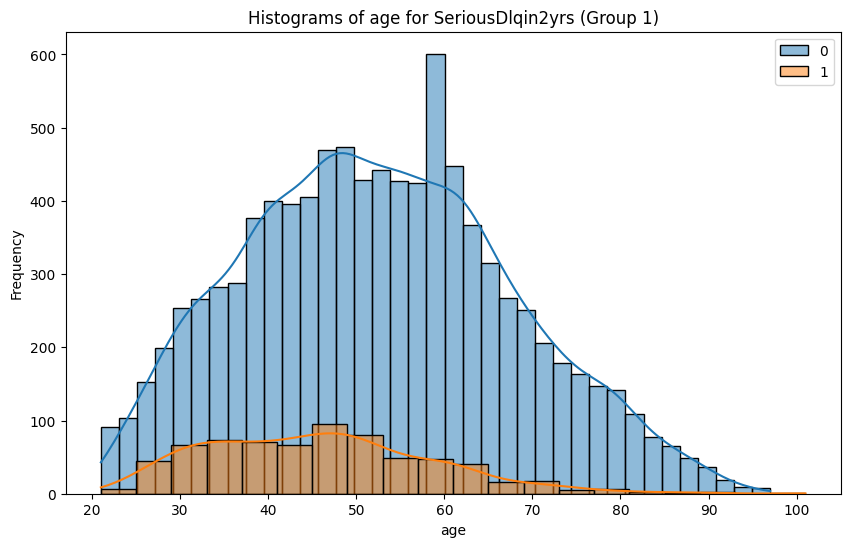

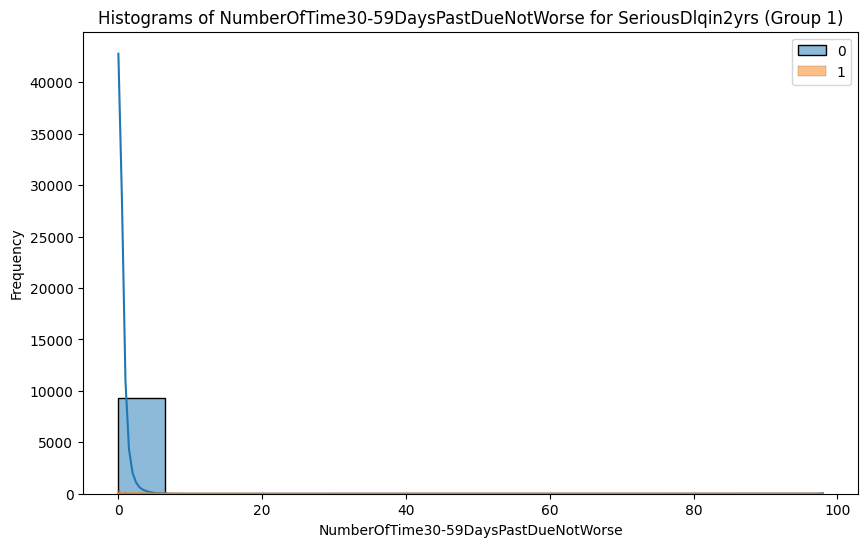

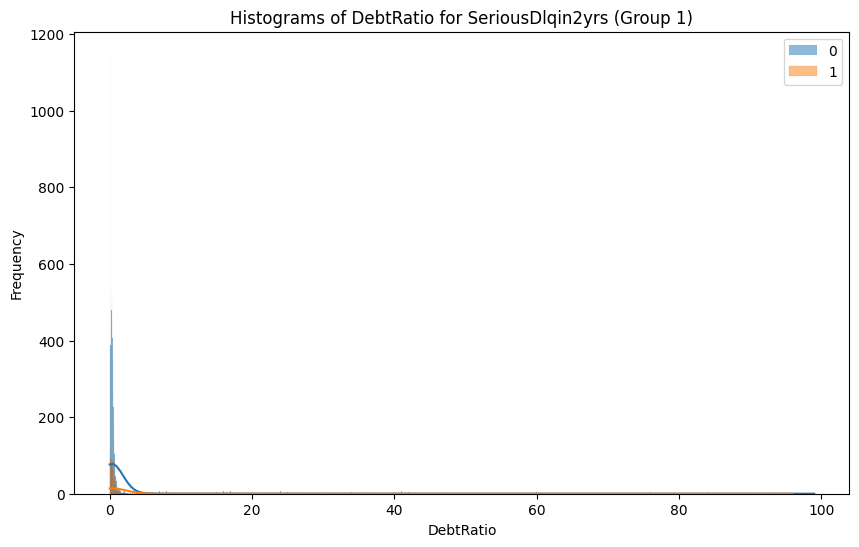

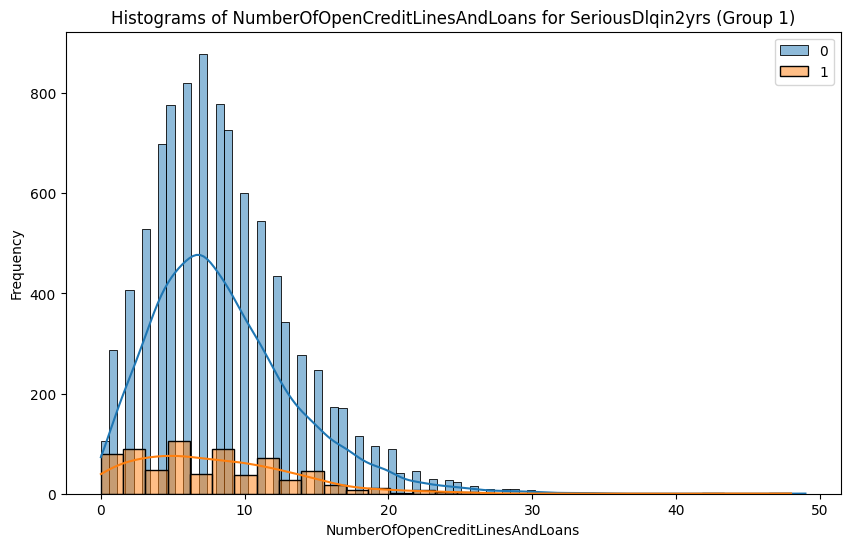

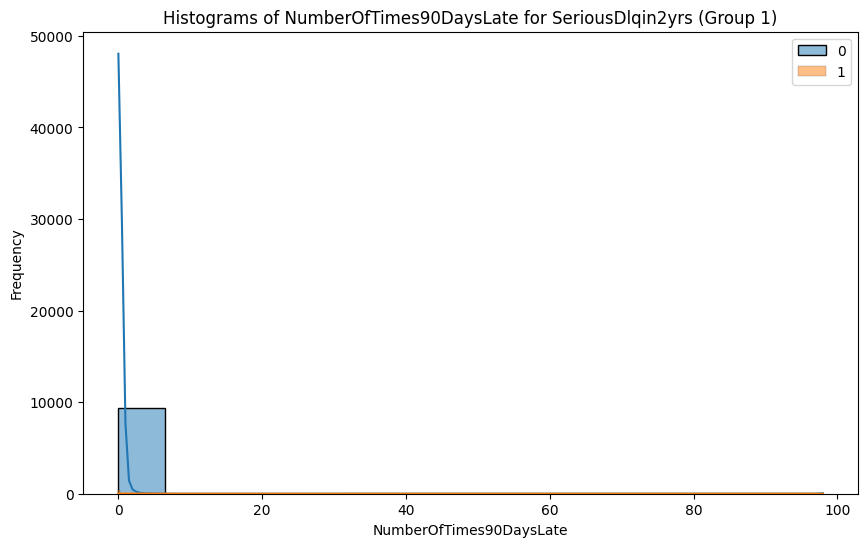

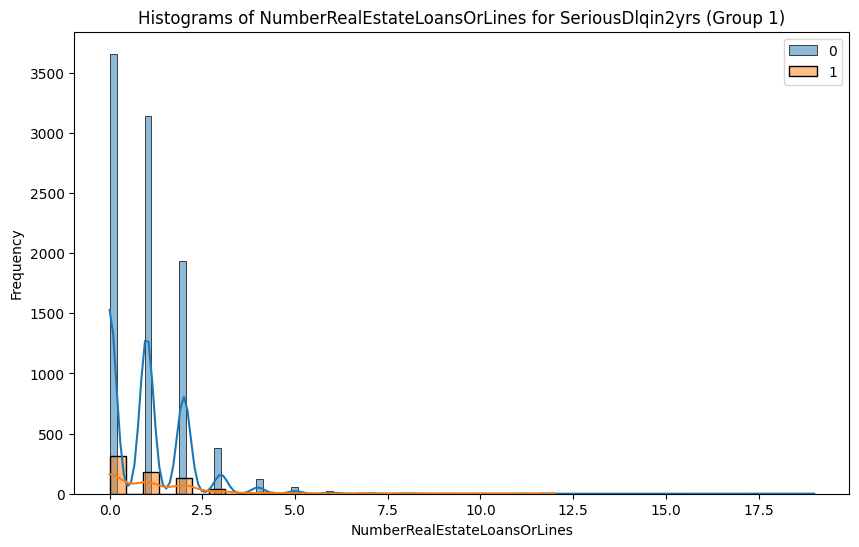

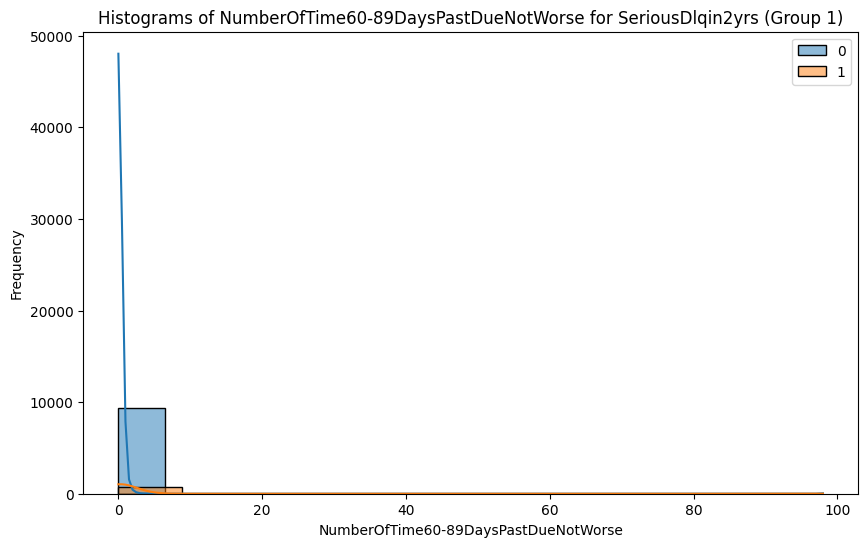

In [18]:
#sns.pairplot(train_set[features[0:4] + [target]], hue = target)
import bootcampviztools as bt
for col in train_set.columns:
    if col != target:
        bt.plot_grouped_histograms(train_set, target, col, group_size = 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x18f726743b0>,
 'caps': [<matplotlib.lines.Line2D at 0x18f72674950>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f72674110>],
 'medians': [<matplotlib.lines.Line2D at 0x18f72674e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f726751c0>],
 'means': []}

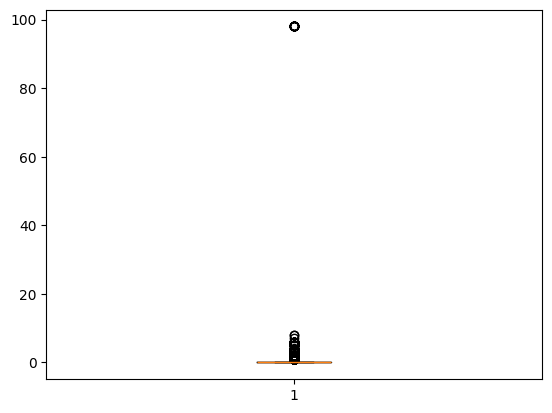

In [25]:
plt.boxplot(df['NumberOfTime30-59DaysPastDueNotWorse'])

In [26]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse']

- Cambiamos las columnas con NumerOf a categoricas agrupadas para 3 instancias

In [27]:
feat_cat = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']

In [28]:
train_set[feat_cat].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,10029.000000,10029.000000,10029.000000
mean,0.384884,0.201516,0.229235
std,3.714056,3.671923,3.689186
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [ ]:
# Me simplifico la vida con el nombre
n_corto = "NumberOfTime30-59DaysPastDueNotWorse"
# Método 1, con pd.cut
labels = [0,1,2] # Cambio 
train_set["N30-59"] = pd.cut(train_set[n_corto], bins = [-1,0,1,10000], labels = labels, right= True).astype(int) # right a True para incluir los valores "a la derecha" en el bin (es decir -1,0 incluye a todos los valores >-1 y <= 0)
test_set["N30-59"] = pd.cut(test_set[n_corto], bins = [-1,0,1,10000], labels = labels, right= True).astype(int) 
train_set["N30-59"].value_counts(True)

In [29]:
train_set['30-59'] = 0
train_set['60-89'] = 0
train_set['90'] = 0
condicion_A = train_set['NumberOfTime30-59DaysPastDueNotWorse'] > 0
condicion_b = train_set['NumberOfTime30-59DaysPastDueNotWorse'] < 50
condicion_c = train_set['NumberOfTime30-59DaysPastDueNotWorse'] > 50
train_set.loc[condicion_A & condicion_b, '30-59'] = 1
train_set.loc[condicion_c, '30-59'] = 2

In [31]:
condicion_A = train_set['NumberOfTime60-89DaysPastDueNotWorse'] > 0
condicion_b = train_set['NumberOfTime60-89DaysPastDueNotWorse'] < 50
condicion_c = train_set['NumberOfTime60-89DaysPastDueNotWorse'] > 50
train_set.loc[condicion_A & condicion_b, '60-89'] = 1
train_set.loc[condicion_c, '60-89'] = 2

In [32]:
condicion_A = train_set['NumberOfTimes90DaysLate'] > 0
condicion_b = train_set['NumberOfTimes90DaysLate'] < 50
condicion_c = train_set['NumberOfTimes90DaysLate'] > 50
train_set.loc[condicion_A & condicion_b, '90'] = 1
train_set.loc[condicion_c, '90'] = 2

- Hacemos lo mismo para test

In [33]:
test_set['30-59'] = 0
test_set['60-89'] = 0
test_set['90'] = 0
condicion_A = test_set['NumberOfTime30-59DaysPastDueNotWorse'] > 0
condicion_b = test_set['NumberOfTime30-59DaysPastDueNotWorse'] < 50
condicion_c = test_set['NumberOfTime30-59DaysPastDueNotWorse'] > 50
test_set.loc[condicion_A & condicion_b, '30-59'] = 1
test_set.loc[condicion_c, '30-59'] = 2

In [34]:
condicion_A = test_set['NumberOfTime60-89DaysPastDueNotWorse'] > 0
condicion_b = test_set['NumberOfTime60-89DaysPastDueNotWorse'] < 50
condicion_c = test_set['NumberOfTime60-89DaysPastDueNotWorse'] > 50
test_set.loc[condicion_A & condicion_b, '60-89'] = 1
test_set.loc[condicion_c, '60-89'] = 2

In [35]:
condicion_A = test_set['NumberOfTimes90DaysLate'] > 0
condicion_b = test_set['NumberOfTimes90DaysLate'] < 50
condicion_c = test_set['NumberOfTimes90DaysLate'] > 50
test_set.loc[condicion_A & condicion_b, '90'] = 1
test_set.loc[condicion_c, '90'] = 2

In [43]:
features.clear()
features = train_set.columns.to_list()
for x in feat_cat:
    features.remove(x)

features

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 '30-59',
 '60-89',
 '90']

In [46]:
correl = train_set[features].corr()
serie_corr = np.abs(correl[target])
serie_corr.sort_values(ascending = False)

SeriousDlqin2yrs                        1.000000
90                                      0.332816
RevolvingUtilizationOfUnsecuredLines    0.280751
60-89                                   0.236711
30-59                                   0.227771
age                                     0.115529
NumberOfOpenCreditLinesAndLoans         0.031254
DebtRatio                               0.020486
NumberRealEstateLoansOrLines            0.001130
Name: SeriousDlqin2yrs, dtype: float64

In [50]:
r_minimo = 0.10
features_borja = serie_corr[serie_corr >= r_minimo].index.to_list()
features_borja

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 '30-59',
 '60-89',
 '90']

<Axes: >

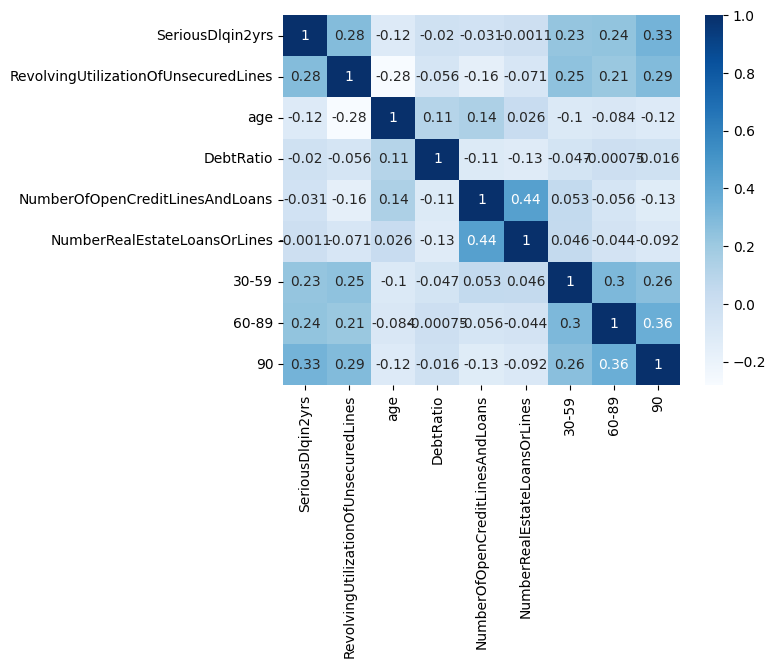

In [45]:
sns.heatmap(train_set[features].corr(), cmap='Blues', annot=True)

In [55]:
features_borja.remove(target)

In [58]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 '30-59',
 '60-89',
 '90']

In [59]:
feat_cat = ['30-59', '60-89',  '90']

- Tratamiento con las features seleccionadas. A nivel visual no se aprecia nada, asique recurriendo a las correlaciones se eliminan las variables con correlaciones inferiores al 10%

In [56]:
X_train = train_set[features_borja]
y_train = train_set[target]
X_test = test_set[features_borja]
y_test = test_set[target]

In [ ]:
resultados = {}

rf_1 = RandomForestClassifier(max_depth= 10, random_state=42)
score = np.mean(cross_val_score(rf_1, X_train, y_train, cv = 5, scoring = 'balanced_accuracy'))
resultados['borja_feat'] = score
resultados

{'borja_feat': np.float64(0.5768676789919787)}

In [61]:
listas = {}
listas['lista_Borja'] = features_borja

- Mutual Information revela correlaciones muy bajas con respecto al target

In [63]:
from sklearn.metrics import mutual_info_score
feat_cat
target
df_mi = train_set.dropna()
for col in feat_cat:
    print(f"MI({col};{target}):", mutual_info_score(df_mi[col],df_mi[target]))

MI(30-59;SeriousDlqin2yrs): 0.019603421982287754
MI(60-89;SeriousDlqin2yrs): 0.016706290095077674
MI(90;SeriousDlqin2yrs): 0.030661521745553734


-ANOVA y seleckbest

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif

'''
f_classif realiza un test ANOVA
a técnica de análisis de varianza (ANOVA) también conocida como análisis factorial y desarrollada por Fisher en 1930,
constituye la herramienta básica para el estudio del efecto de uno o más factores (cada uno con dos o más niveles) sobre
la media de una variable continua. Es por lo tanto el test estadístico a emplear cuando se desea comparar las medias de
dos o más grupos.
'''
#features_num.remove("quality")
X_train = train_set[features]
y_train 
selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
lista_ANOVA = X_train_kbest.columns.to_list()
listas['lista_ANOVA'] = lista_ANOVA


- SelectFromModel

In [70]:
rf_1.fit(train_set[features], y_train)
rf_1.feature_importances_

array([0.25276837, 0.14128276, 0.16305985, 0.11284706, 0.04632777,
       0.065555  , 0.05907174, 0.15908744])

In [ ]:
from sklearn.feature_selection import SelectFromModel
selector_model = SelectFromModel(estimator = rf_1, threshold= "median") #treshold determina las varibales que pasan al modelo
selector_model.fit(train_set[features],y_train) 

X_train_model = pd.DataFrame(selector_model.transform(train_set[features]), columns = selector_model.get_feature_names_out())
lista_model = X_train_model.columns.to_list()
listas['lista_model'] = lista_model
X_train_model

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,90
0,0.952783,51.0,0.478968,0.0
1,1.000000,45.0,0.491605,0.0
2,0.538922,33.0,0.089734,0.0
3,0.036962,46.0,0.322784,0.0
4,0.089869,42.0,0.091979,0.0
...,...,...,...,...
10024,0.042309,44.0,0.205981,0.0
10025,0.227732,69.0,0.655826,0.0
10026,0.577547,57.0,0.865273,0.0
10027,0.926410,31.0,0.471008,0.0


- Eliminación Recursiva de Features RFE

In [72]:
from sklearn.feature_selection import RFE

rf_1 

rfe = RFE(estimator = rf_1,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train[features], y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features).sort_values("ranking")

[1 1 1 1 4 3 2 1]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
NumberOfOpenCreditLinesAndLoans,1
90,1
60-89,2
30-59,3
NumberRealEstateLoansOrLines,4


In [74]:
X_train_rfe = pd.DataFrame(rfe.transform(train_set[features]), columns = rfe.get_feature_names_out())
lista_RFE = X_train_rfe.columns.to_list()
listas['lista_RFE'] = lista_RFE

- Selección secuencial de Features

In [75]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_1

sfs_forward = SequentialFeatureSelector(rf_1,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train[features], y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(max_depth=10,
                                                           random_state=42),
                          n_features_to_select=5, scoring='balanced_accuracy')

In [77]:
sfs_forward.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfOpenCreditLinesAndLoans', '30-59', '60-89', '90'],
      dtype=object)

In [78]:
X_train_sfs = pd.DataFrame(sfs_forward.transform(train_set[features]), columns = sfs_forward.get_feature_names_out())
lista_sfs = X_train_sfs.columns.to_list()
listas['lista_SFS'] = lista_sfs


In [80]:
for x,y in listas.items():
    print(f'la lista {x} tiene los siguientes elementos {y}')

la lista lista_Borja tiene los siguientes elementos ['RevolvingUtilizationOfUnsecuredLines', 'age', '30-59', '60-89', '90']
la lista lista_ANOVA tiene los siguientes elementos ['RevolvingUtilizationOfUnsecuredLines', 'age', '30-59', '60-89', '90']
la lista lista_model tiene los siguientes elementos ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', '90']
la lista lista_RFE tiene los siguientes elementos ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', '90']
la lista lista_SFS tiene los siguientes elementos ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans', '30-59', '60-89', '90']


In [81]:
puntuaciones = {}
for x,y in listas.items():
    score = np.mean(cross_val_score(rf_1, train_set[y], y_train, cv = 5, scoring='balanced_accuracy'))
    puntuaciones[x] = score

puntuaciones


{'lista_Borja': np.float64(0.5768676789919787),
 'lista_ANOVA': np.float64(0.5768676789919787),
 'lista_model': np.float64(0.5689882536259143),
 'lista_RFE': np.float64(0.5669621890198323),
 'lista_SFS': np.float64(0.579259641555044)}

In [97]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state= 42, max_depth=10)
puntuaciones_2 = {}
for x,y in listas.items():
    score = np.mean(cross_val_score(tree_clf, train_set[y], y_train, cv = 5, scoring='balanced_accuracy'))
    puntuaciones_2[x] = score

puntuaciones_2

{'lista_Borja': np.float64(0.5901319111461215),
 'lista_ANOVA': np.float64(0.5901319111461215),
 'lista_model': np.float64(0.5916390193838158),
 'lista_RFE': np.float64(0.5775431474410391),
 'lista_SFS': np.float64(0.5913864769723636)}

In [98]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)
puntuaciones_3 = {}
for x,y in listas.items():
    score = np.mean(cross_val_score(cat_clf, train_set[y], y_train, cv = 5, scoring='balanced_accuracy'))
    puntuaciones_3[x] = score

puntuaciones_3

{'lista_Borja': np.float64(0.5698329668829408),
 'lista_ANOVA': np.float64(0.5698329668829408),
 'lista_model': np.float64(0.5686668537688224),
 'lista_RFE': np.float64(0.5759409270543537),
 'lista_SFS': np.float64(0.5778237671821498)}

In [102]:
ganadora = listas['lista_model']
ganadora

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', '90']

In [122]:
X_train = train_set[ganadora]


- Ganador DecisionTree Clasiffier

Randomized Search

In [123]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
tree_clf = DecisionTreeClassifier(random_state= 42, max_depth=10, class_weight='balanced')

param_grid = {
    "max_depth": [1,2,4,8,None],
    "min_samples_leaf": [1,5,10,20],
    "max_features": ["sqrt","log2", None]
}

tree_grid = RandomizedSearchCV(tree_clf, 
                               cv =5,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "balanced_accuracy")

tree_grid.fit(X_train,y_train)
print("Tree best_score:", tree_grid.best_score_)


Tree best_score: 0.7543277190406453


              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2335
           1       0.18      0.76      0.29       173

    accuracy                           0.74      2508
   macro avg       0.58      0.75      0.57      2508
weighted avg       0.92      0.74      0.81      2508



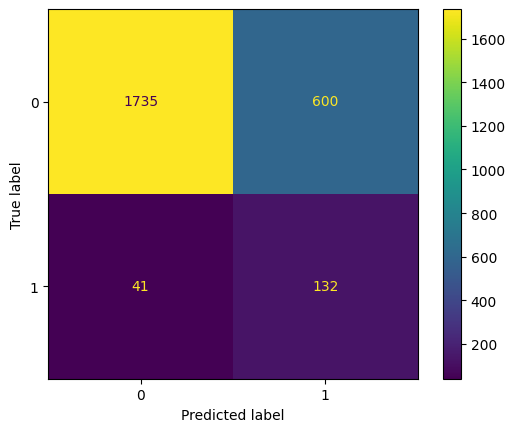

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

y_pred = tree_grid.best_estimator_.predict(test_set[ganadora])
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

GridSearch

In [125]:
param_grid = {
    "max_depth": [1,2,4,8,None],
    "min_samples_leaf": [1,5,10,20],
    "max_features": ["sqrt","log2", None]
}

tree_grid_2 = GridSearchCV(tree_clf, 
                               cv =5,
                               param_grid= param_grid, 
                               scoring = "balanced_accuracy")

tree_grid_2.fit(X_train,y_train)
print("Tree best_score:", tree_grid_2.best_score_)


Tree best_score: 0.7543277190406453


              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2335
           1       0.18      0.76      0.29       173

    accuracy                           0.74      2508
   macro avg       0.58      0.75      0.57      2508
weighted avg       0.92      0.74      0.81      2508



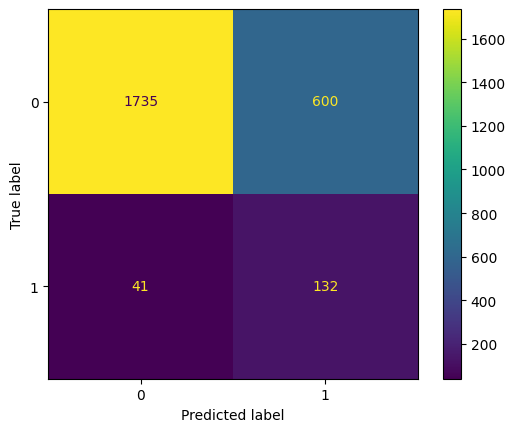

In [126]:
y_pred = tree_grid_2.best_estimator_.predict(test_set[ganadora])
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Todo el dataset

In [130]:
tree_clf = DecisionTreeClassifier(random_state= 42, max_depth=10, class_weight='balanced')
param_grid = {
    "max_depth": [1,2,4,8,None],
    "min_samples_leaf": [1,5,10,20],
    "max_features": ["sqrt","log2", None]
}

tree_grid_3 = GridSearchCV(tree_clf, 
                               cv =5,
                               param_grid= param_grid, 
                               scoring = "balanced_accuracy")

tree_grid_3.fit(train_set[features],y_train)
print("Tree best_score:", tree_grid_3.best_score_)

Tree best_score: 0.7543277190406453


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.